In [2]:
%pip install pandas matplotlib transformers -qU

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tmp\labelled_newscatcher_dataset.csv", sep = ';')
df.head()


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Aital\AppData\Local\Temp\ipykernel_15900\2086375692.py:4: SyntaxWarning: invalid escape sequence '\l'
  df = pd.read_csv("tmp\labelled_newscatcher_dataset.csv", sep = ';')


,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en


Текущий день: 2020-08-18 05:49:00
43086
652644


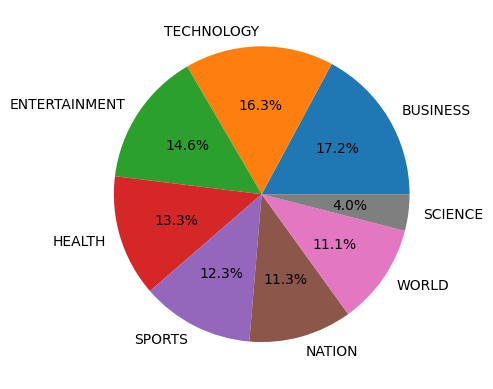

In [4]:
from datetime import datetime, timedelta

#Надо переделать published_date в datetime
df['published_date'] = pd.to_datetime(df['published_date'])

# Типо получаем текущую дату и время
current_date = df.loc[df['published_date'].idxmax()]['published_date']
print(f"Текущий день: {current_date}")

# Вычисляем дату и время, которые были день
one_day_ago = current_date - timedelta(days=1)

# Фильтруем DataFrame, оставляя только элементы за последний день
recent_df = df[df['published_date'] >= one_day_ago]
print(recent_df.size)
print(df.size)

topic_counts = recent_df['topic'].value_counts()
plt.pie(topic_counts, labels = topic_counts.index, autopct='%1.1f%%')
plt.show()


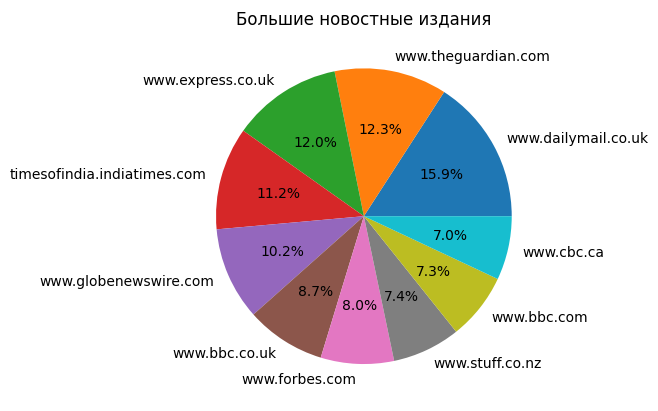

In [5]:
from urllib.parse import urlparse

# Функция для извлечения домена
def extract_domain(url):
    parsed = urlparse(url)
    return parsed.netloc  # Возвращаем только домен

# Применяем функцию к столбцу 'link' и создаем новый столбец 'domain'
df['domain'] = df['link'].apply(extract_domain)

# Группируем по доменам и считаем количество статей для каждого домена
count_by_domain = df['domain'].value_counts().reset_index()
count_by_domain.columns = ['domain', 'count']

# Выводим результат
plt.pie(count_by_domain[:10]['count'], labels=count_by_domain[:10]['domain'], autopct='%1.1f%%')
plt.title("Большие новостные издания")
plt.show()

# Сентиментальных анализ

In [6]:
from transformers import pipeline

# Load the classification pipeline with the specified model
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

def sentiment(text):
    return pipe(text)[0]['label']

recent_df['sentiment'] = recent_df['title'].apply(lambda x: sentiment(x))

C:\Users\Aital\Desktop\PyProjects\RedRobotTask\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
C:\Users\Aital\AppData\Local\Temp\ipykernel_15900\2434474428.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['sentiment'] = recent_df['title'].apply(lambda x: sentiment(x))


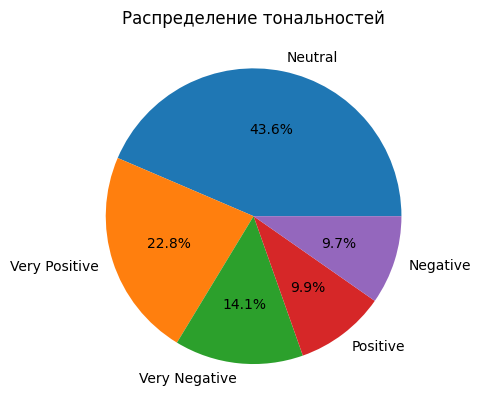

In [7]:
sentiment_count = recent_df['sentiment'].value_counts().reset_index()
plt.pie(sentiment_count['count'], labels=sentiment_count['sentiment'], autopct='%1.1f%%')
plt.title('Распределение тональностей')
plt.show()

C:\Users\Aital\AppData\Local\Temp\ipykernel_15900\962921180.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_sentiments))


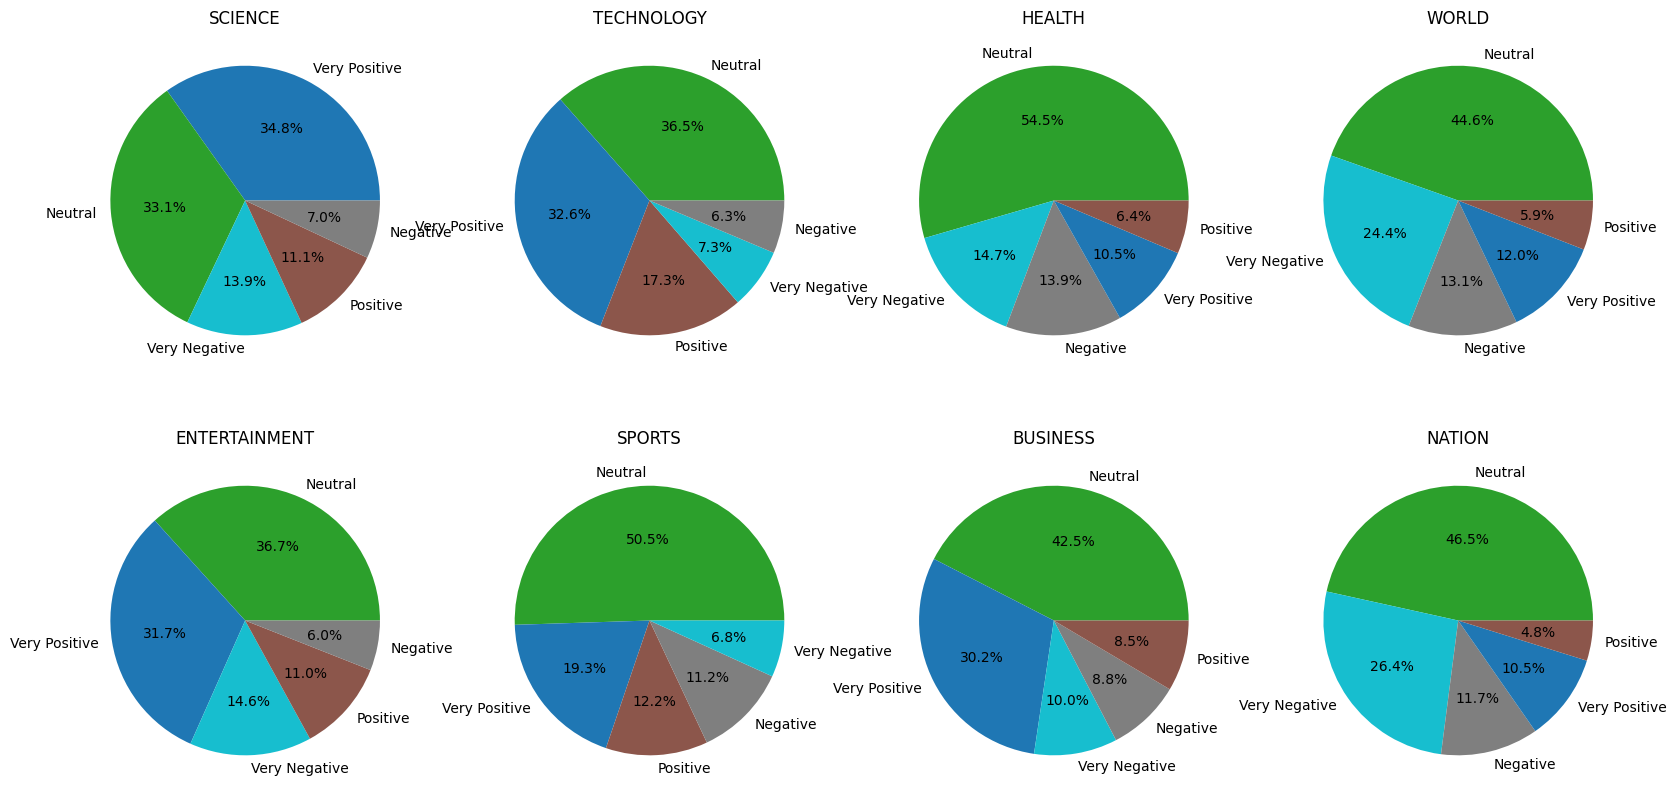

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))

# Получаем все уникальные значения sentiment
unique_sentiments = recent_df['sentiment'].unique()

# Создаём палитру цветов для каждого sentiment
colors = plt.cm.get_cmap("tab10", len(unique_sentiments))
colormap = {sent: colors(i) for i, sent in enumerate(unique_sentiments)}

topics = recent_df['topic'].unique()
for i, x in enumerate(topics):
    sentiment_count = recent_df[recent_df['topic'] == x]['sentiment'].value_counts().reset_index()
    
    # Применяем цвета на основе словаря colormap
    pie_colors = [colormap[sent] for sent in sentiment_count['sentiment']]
    
    axes[i // 4, i % 4].pie(sentiment_count['count'], labels=sentiment_count['sentiment'], autopct='%1.1f%%', colors=pie_colors)
    axes[i // 4, i % 4].set_title(x)

plt.show()


# Заключение